In [1]:
# import data manipulation and visualisation libraries
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# import nltk libraries for text mining
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [2]:
#read the dictionary that contain keywords of occupations
dic = open("construction occupation name.txt","r")
occupations_dict = dic.read()

In [3]:
# import cleaned and labelled Osha accident cases dataset
df_osha = pd.read_csv('osha_fatal_clean_cause_labelled.csv')

In [5]:
# drop the unused columns
df_osha = df_osha.drop(["Unnamed: 0"], axis = 1)

In [6]:
# inspect the dataset
df_osha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6568 entries, 0 to 6567
Data columns (total 6 columns):
incident_ID                    6568 non-null int64
title                          6568 non-null object
description                    6568 non-null object
cause                          6568 non-null object
title_description              6568 non-null object
title_description_processed    6568 non-null object
dtypes: int64(1), object(5)
memory usage: 308.0+ KB


In [7]:
# Combine the string in "title" and "description" adn stored in a new column
df_osha['title_description'] = df_osha['title'] + " " + df_osha['description']

In [8]:
# define a function for text mining with the following steps:
# 1. remove the non English words
# 2. tokenize the string for each row
# 3. remove punctiation
# 4. convert each of the token to lower case
# 5. remove stopwords
# 6. lemmatize each of the token
# 7. join the tokens back into string

mystopwords = stopwords.words("English")
wnlemma = nltk.WordNetLemmatizer()

def pre_process(text):
    text = re.sub(r'\d+', '', text)
    tokens = nltk.word_tokenize(text)
    tokens_nop = [word for word in tokens if word not in string.punctuation]
    tokens_lower = [ word.lower() for word in tokens_nop ]
    tokens_nostop = [word for word in tokens_lower if word not in mystopwords]
    tokens_lemma = [wnlemma.lemmatize(word) for word in tokens_nostop]
    text_after_process = " ".join(tokens_lemma)
    return(text_after_process)

In [9]:
# apply the "pre_process" function on each row of "title" column of labelled Osha accident cases dataset
df_osha['title_description_processed'] = df_osha['title_description'].apply(pre_process)

In [10]:
# define a function for occupations word extraction with the following steps:
# 1. remove the non English words
# 2. tokenize the string for each row
# 3. extract the unique occupation keyword
# 4. join the tokens back into string

occupations_dict_token = nltk.word_tokenize(occupations_dict.lower())

def extraction(text):
    text = re.sub(r'\d+', '', text)
    tokens = nltk.word_tokenize(text)
    tokens_occupation = [word for word in tokens if word in occupations_dict_token]
    text_after_process = " ".join(set(tokens_occupation))
    return(text_after_process)

In [11]:
# apply the "extraction" function on each row of "title_description_processed" column of labelled Osha accident cases dataset
df_osha['occupation'] = df_osha['title_description_processed'].apply(extraction)

In [12]:
# Concatenate all the occupation keyword into one huge text file
occupation_string = ""
for word in df_osha['occupation']:
    occupation_string += " " + word

In [13]:
# tokenize the string with all occupations
occupation_token = nltk.word_tokenize(occupation_string)

In [14]:
# store the occupations extracted in a dataframe
df_occupations = pd.DataFrame(data=occupation_token)
df_occupations = df_occupations.rename(columns={0: "occupations"})

In [15]:
# calculate the top 20 number of occupation that cause accidents
df_occupations['occupations'].value_counts().head(20)

worker            851
operator          698
supervisor        256
foreman           157
laborer           150
manager           103
welder             64
electrician        57
helper             53
carpenter          51
driller            40
engineer           39
assistant          34
superintendent     30
painter            25
inspector          23
cleaner            22
roofer             21
installer          17
apprentice         16
Name: occupations, dtype: int64

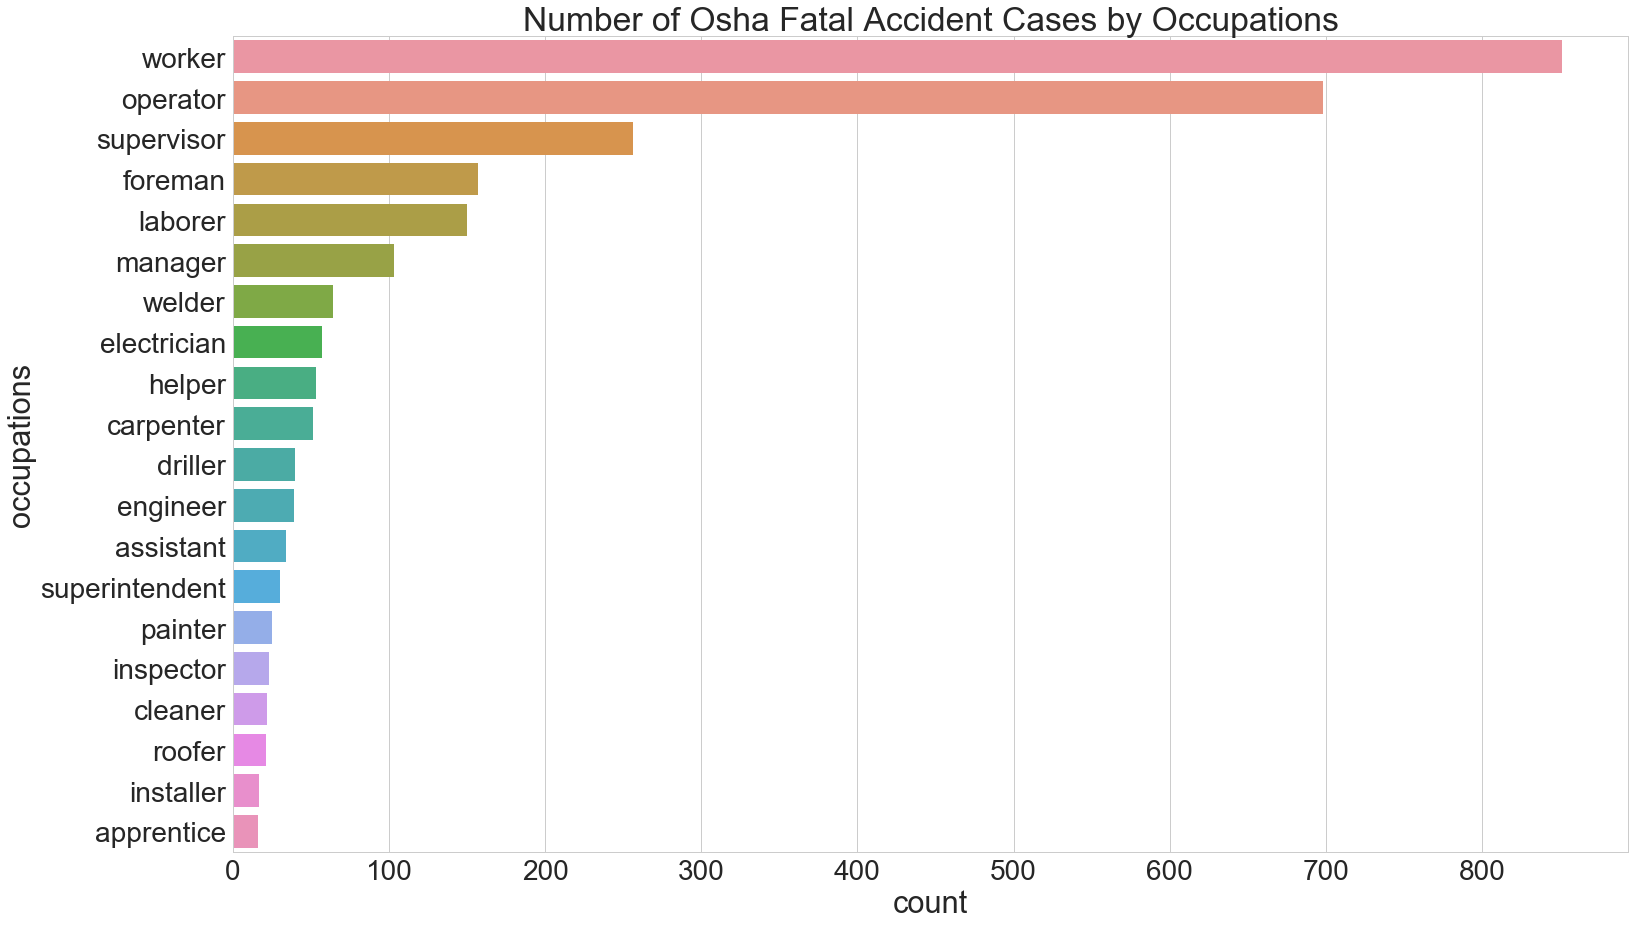

In [16]:
# plot the barchart of the top 20 number of occupation that cause accidents
plt.figure(figsize=(25,15))
sns.set(style="whitegrid", font_scale=2.8)
ax = sns.countplot(y="occupations", data=df_occupations, order=df_occupations['occupations'].value_counts().head(20).index)
ax.set_title('Number of Osha Fatal Accident Cases by Occupations')
plt.show()

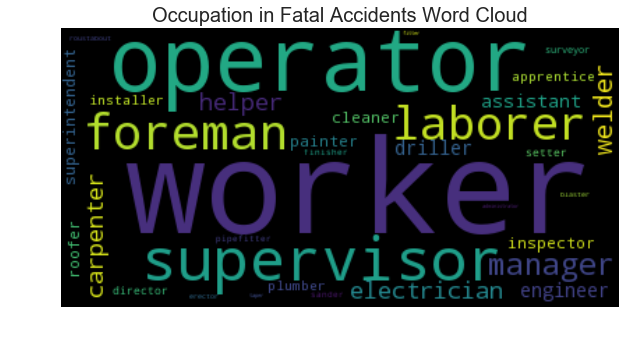

In [17]:
# Generate a occupation word cloud image
wordcloud = WordCloud(collocations=False).generate(occupation_string)
plt.figure(figsize=(10, 8))
plt.title('Occupation in Fatal Accidents Word Cloud', fontsize = 20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()